In [2]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Elliot Linsey - CRM Analysis Tasks

The data and tasks presented are created to replicate a Customer Relation Management environment, with analysis between promotional packages and whether they have an impact on revenue earned. 

## Task 1

Beginning with data cleaning tasks and converting the needed columns to the correct data type. 

In [3]:
df = pd.read_csv('Task1.csv').drop(columns=['PlayerID'],axis=1).rename(columns={' Activity ': 'Activity'})
df.Activity = df['Activity'].replace(',','', regex=True)
df.Activity = pd.to_numeric(df.Activity)
df['Gross'] = df.Activity*0.0213
df.head()

,Activity,Country,Group,Gross
0,418,Ofu,1,8.9034
1,2,Ofu,4,0.0426
2,1868,Ofu,3,39.7884
3,6319,Ofu,5,134.5947
4,1045,Ofu,5,22.2585


Separating the activity points of each group. 

In [4]:
one = df.Activity[df.Group == 1]
two = df.Activity[df.Group == 2]
three = df.Activity[df.Group == 3]
four = df.Activity[df.Group == 4]
five = df.Activity[df.Group == 5]

Our null hypothesis in this experiment is that there is no difference between the bonuses on offer to the players and the amount of activity points earned. To test this, there are five different groups. Four have rewards ranging from \\$5 to \\$25 whilst the 5th group is a control which offers no reward. 

Performing a one way ANOVA test with p-value threshold of 0.05 to identify whether any of the groups are significantly different from one another. This is a one way test so we are determining whether one group is higher than the other. As the resulting p-value is below 0.05, we can confirm that at least one group is significantly different from the other. 

In [5]:
pval = stats.f_oneway(one,two,three,four,five)[1]
print('p-value = ' + str(pval))

p-value = 0.02106606379623132


We are only interested in the difference of groups with respect to the control group. Performing a further Tukey Test identifies that the majority of groups are not significantly different to one another with the exception of groups 3 (\\$25 bonus) and 5 (the control group). 

As the p-value is below 0.05, we can conclude that if we were to repeat this experiment multiple times with different samples, there is a less than 5\% chance that we would observe these results if the null hypothesis were true. Therefore, we can reject the null hypothesis that there is no significant difference between the bonus of \\$25 and the control group. 

In [6]:
tukey_results = pairwise_tukeyhsd(df['Activity'], df['Group'], 0.05)
print(tukey_results)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
     1      2  -572.0835 0.6237 -1705.1254  560.9584  False
     1      3    238.838    0.9  -860.7217 1338.3977  False
     1      4  -625.2949 0.5243 -1724.0058   473.416  False
     1      5 -1061.9122 0.1174  -2272.515  148.6906  False
     2      3   810.9215 0.2953  -328.2784 1950.1214  False
     2      4   -53.2114    0.9 -1191.5921 1085.1692  False
     2      5  -489.8287 0.7971 -1736.5459  756.8886  False
     3      4  -864.1329  0.206 -1969.1932  240.9273  False
     3      5 -1300.7502 0.0291 -2517.1183   -84.382   True
     4      5  -436.6173 0.8493 -1652.2182  778.9837  False
-----------------------------------------------------------


We can also calculate the amount of Gross Rev earned for each group, and the cost of the bonuses given out to the players. 

In [7]:
df.Group.value_counts().sort_index()

1    22070
2    19216
3    21565
4    21631
5    15192
Name: Group, dtype: int64

In [8]:
df_group = df.groupby(['Group']).Activity.sum().reset_index()
df_group

,Group,Activity
0,1,157938875
1,2,126521724
2,3,159475500
3,4,141271518
4,5,92585481


As we can see, group 3 brought in the most gross rev but due to having the highest rewards cost it was not the highest earner overall, with that distinction going to group 1. 

At this stage we can conclude the experiment to be a success and state that using a rewards system does result in higher gross rev than without. However, this difference only starts to occur without the influence of random noise over the \\$25 mark as only group 3 was significantly different to the control group. There are potentially other factors that can be considered, including country which may have different wealth levels as well as personal, such as the amount of time available to the player to play. 

In [9]:
print('Group 1 cost $' + str(22070*20) + ' for a Gross Rev of $' + str(round(157938875*0.0213,2)) + '. This is a difference of $' + str(round(157938875*0.0213 - 22070*20,2)))
print('Group 2 cost $' + str(19216*15) + ' for a Gross Rev of $' + str(round(126521724*0.0213,2)) + '. This is a difference of $' + str(round(126521724*0.0213 - 19216*15,2)))
print('Group 3 cost $' + str(21565*25) + ' for a Gross Rev of $' + str(round(159475500*0.0213,2)) + '. This is a difference of $' + str(round(159475500*0.0213 - 21565*25,2)))
print('Group 4 cost $' + str(21631*5) + ' for a Gross Rev of $' + str(round(141271518*0.0213,2)) + '. This is a difference of $' + str(round(141271518*0.0213 - 21631*5,2)))
print('Group 5 was the control group which cost nothing but brought in a Gross Rev of $' + str(round(92585481*0.0213,2)))

Group 1 cost $441400 for a Gross Rev of $3364098.04. This is a difference of $2922698.04
Group 2 cost $288240 for a Gross Rev of $2694912.72. This is a difference of $2406672.72
Group 3 cost $539125 for a Gross Rev of $3396828.15. This is a difference of $2857703.15
Group 4 cost $108155 for a Gross Rev of $3009083.33. This is a difference of $2900928.33
Group 5 was the control group which cost nothing but brought in a Gross Rev of $1972070.75


The ROI for Group 3 = \\$5.30. For every \\$1 spent in this promotion, we made \\$5.30. I'm using ROI = (Gross - Spent)/Spent which in this case is (3396828.15 - 539125)/539125 = \$5.3

In [10]:
print('ROI for Group 3 = $' + str(2857703.15/539125))

ROI for Group 3 = $5.300631857175979


## Task 2

Beginning with data cleaning to remove the extra characters from Gross Revenue and convert it to a numerical data type as with task 1. 

In [28]:
df2 = pd.read_csv('Task2.csv')
df2['Gross Revenue'] = df2['Gross Revenue'].str.replace(',','',regex=True).str.replace('$','',regex=True).astype(int)
df2.head()

,Year,Week,Gross Revenue
0,2015,1,349043
1,2015,2,342759
2,2015,3,312714
3,2015,4,324406
4,2015,5,289567


From plotting the data we can see immediate differences in the weeks 5 to 8 between both years. In 2015 it appears to have dropped sharply whilst in 2016 it rises steeply. From weeks 13 to 17 both years appear fairly steady with minor rises and falls. As we are comparing the impact of the promotion from weeks 5 to 8 and 13 to 17, I have cut off the 2015 graph past week 25 for easier comparison to the 2016 graph, as the 2016 graph lacks data past week 25.  

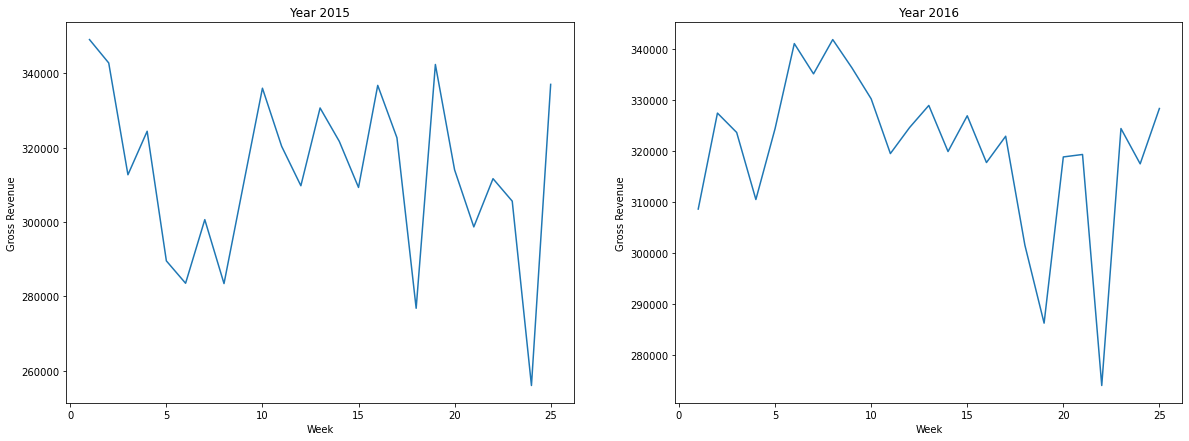

In [35]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,7))
sns.lineplot(x=df2.Week[df2.Year==2015], y=df2['Gross Revenue'][(df2.Year==2015) & (df2.Week.isin(range(26)))],ax=ax1)
sns.lineplot(x=df2.Week[df2.Year==2016], y=df2['Gross Revenue'][df2.Year==2016],ax=ax2)
ax1.set_title('Year 2015')
ax2.set_title('Year 2016')

plt.show()

Creating a dataframe that isolates the weeks we are looking to compare. 

In [34]:
df_weeks = df2[df2.Week.isin([5,6,7,8,13,14,15,16,17])].reset_index(drop=True)
df_weeks

,Year,Week,Gross Revenue
0,2015,5,289567
1,2015,6,283549
2,2015,7,300651
3,2015,8,283467
4,2015,13,330666
5,2015,14,321685
6,2015,15,309301
7,2015,16,336736
8,2015,17,322654
9,2016,5,324459


We can perform a related T-test with a p-value threshold of 0.05 on these two sets of values between the years. We find that in comparison to 2015, there was a significant difference in revenue brought in during the first promotion in 2016. Be mindful that this does not imply causation as other confounding factors may have had an impact and 2015 was not created as a control, but in the context of the exercise we can suggest that the promotion that ran during these weeks did increase gross revenue in contrast to 2015 when the promotion was not run. 

For the second running of the exercise we find no significant difference and therefore the promotion does not appear to have had a major impact on increasing gross revenue. 

In [14]:
print('P-value for weeks 5 to 8 = ' + str(stats.ttest_rel([289567,283549,300651,283467],[324459,341161,335210,341948])[1]))
print('P-value for weeks 13 to 17 = ' + str(stats.ttest_rel([330666,321685,309301,336736,322654],[329001,319940,326966,317775,322949])[1]))

P-value for weeks 5 to 8 = 0.006270229324482977
P-value for weeks 13 to 17 = 0.886534447416126


We can calculate the total gross revenue after subtracting the promotional costs for both campaigns. We find that running the campaign for weeks 5 to 8 in 2016 resulted in an extra \\$76822 compared to 2015. However, there was no significant difference between weeks 13 to 17 in 2016 and we not only didn't increase gross revenue (in fact we lost \\$4411 for the same period in 2016 compared to 2015), but also had to pay the promotional costs putting us in strong negative result of -\\$230406 in comparison to 2015.

In [15]:
print('Extra Gross Revenue after promotional costs for weeks 5 to 8: $' + str((df_weeks['Gross Revenue'].iloc[9:13].sum() - df_weeks['Gross Revenue'].iloc[0:4].sum())-108722))
print('Extra Gross Revenue after promotional costs for weeks 13 to 17: $' + str((df_weeks['Gross Revenue'].iloc[13:].sum() - df_weeks['Gross Revenue'].iloc[4:9].sum()) - 225995))

Extra Gross Revenue after promotional costs for weeks 5 to 8: $76822
Extra Gross Revenue after promotional costs for weeks 13 to 17: $-230406


We can calculate the ROI for the first promotion in 2016 as that resulted in significant gains. This figure is $11.35. Again, this is not a guarantee that the promotion is responsible for the extra revenue as there may have been other factors or influences present during 2016 which resulted in these differences. 

In [16]:
print('ROI for promotion 1 = $' + str((df_weeks['Gross Revenue'].iloc[9:13].sum() - 108722)/108722))

ROI for promotion 1 = $11.350563823329225


For both Tasks 1 & 2 I have used classical statistical methods, it would be interesting to analyse the data using Bayesian methods.

Thanks for reading! 

Elliot Linsey